In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl

In [25]:
ref = [
    "In my opinion ... ",
    "with that said ...",
    "in other words ...",
    "            go ... ",
    "Hi, my name is ... ",
    "                    Where is ... ",
    "Once upon a ...",
    "I wish ...",
]
    
    

In [26]:
path = "../data/flashy/flashy_gpt2/val_dl/val-dl_flashy_gpt2_flashy_1000mc.pkl"
data = read_pkl(path)

In [27]:
# print(data.keys())
df = data['intermediate_query_probs'][:,:,[30,13,0,26]]

In [28]:
df.shape

torch.Size([8, 31, 4])

In [29]:
# for i in range(7):
#     plt.figure(figsize = (12,8))
#     plt.bar(range(21),df[i].sum(dim=-1).numpy(),label=ref[i])
#     plt.legend()
#     plt.ylim(0,0.13)
#     plt.show()

In [32]:
df_list = []
for i in range(df.shape[0]):
    print(df[i].sum())
    tdf = pd.DataFrame(df[i].sum(dim=-1).numpy())
    tdf['label'] = ref[i]
    tdf['step'] = list(range(1,32,1))
    df_list.append(tdf)
    # print(df[0].shape)
fdf = pd.concat(df_list,axis=0)
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
fdf.shape
# fdf = fdf[fdf.step < 15]
fdf.columns = ['x','g','Steps in Sequence']
fdf.head()

tensor(0.4708)
tensor(0.4240)
tensor(0.4362)
tensor(0.4984)
tensor(0.4859)
tensor(0.5182)
tensor(0.5042)
tensor(0.4816)


,x,g,Steps in Sequence
0,0.000098,In my opinion ...,1
1,0.003496,In my opinion ...,2
2,0.004521,In my opinion ...,3
3,0.009170,In my opinion ...,4
4,0.009814,In my opinion ...,5


In [35]:
fdf.to_csv("gpt2_flashy_queries.csv",index=None)

/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


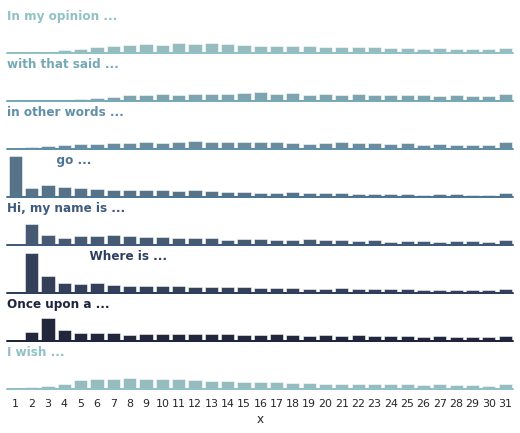

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# print(df.head())
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True,ylim=(0,0.11), height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'Steps in Sequence','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)

## Flashy Apps

In [299]:
path = "../data/flashy/flashy_apps/val_dl/num_val-dl_flashy_apps_flashy_10000mc.pkl"
data = read_pkl(path)

a_den = "../data/flashy/flashy_apps/val_dl/a_den_val-dl_flashy_apps_flashy_10000mc.pkl"
a_den = read_pkl(a_den)['intermediate_query_probs'].sum(dim=1)
b_den = "../data/flashy/flashy_apps/val_dl/b_den_val-dl_flashy_apps_flashy_10000mc.pkl"
b_den = read_pkl(b_den)['intermediate_query_probs'].sum(dim=1)

In [290]:
# print(data['intermediate_query_probs'].shape)
# data = torch.LongTensor(samples).unsqueeze(-1)
# print(data)
# data = data.expand(9,16)
# data.shape

In [291]:
for i in range(iqp.shape[0]):
    print(torch.argmax(iqp[i]))

tensor(24)
tensor(87)
tensor(0)
tensor(49)
tensor(78)
tensor(56)
tensor(54)


<BarContainer object of 88 artists>

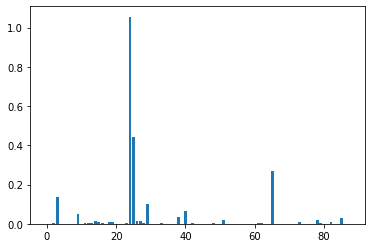

In [292]:
plt.bar(range(iqp.shape[-1]), iqp[0])

In [293]:
last_two_high_social_low_comms = [[57, 34, 19, 52, 52, 34, 52, 19, 19, 34],
 [57, 55, 67, 57, 47, 19, 47, 57, 67, 67]]
mid_two = [[57, 19, 52, 34, 52, 14, 81, 44, 51, 60],
 [81, 44, 40, 81, 73, 52, 57, 55, 33, 57],]

high_comm_low_social =[[40, 73, 40, 82, 60, 40, 51, 82, 40, 79],[81, 16, 3, 79, 3, 41, 74, 44, 30, 74]] 

In [294]:
data['metadata']['text_dict']['samples']

[[40, 73, 40, 82, 60, 40, 51, 82, 40, 79],
 [81, 16, 3, 79, 3, 41, 74, 44, 30, 74],
 [34, 47, 67, 18, 81, 74, 16, 41, 16, 74],
 [57, 19, 52, 34, 52, 14, 81, 44, 51, 60],
 [81, 44, 40, 81, 73, 52, 57, 55, 33, 57],
 [57, 34, 19, 52, 52, 34, 52, 19, 19, 34],
 [57, 55, 67, 57, 47, 19, 47, 57, 67, 67]]

In [295]:
social_media = data['metadata']['text_dict']['social_media']
comms = data['metadata']['text_dict']['comms']

In [300]:
# samples = [45,85,47,31,8,65,67,9,57]
# lst = ['Mine','youtube','netflix','hulu','calculator','settings','snapchat','calendar','reddit']
# a_b = torch.gather(iqp,-1,
#                     torch.LongTensor(social_media).unsqueeze(0).expand((iqp.shape[0],iqp.shape[1],len(social_media))))
# b_a = torch.gather(iqp,-1,
#                     torch.LongTensor(comms).unsqueeze(0).expand((iqp.shape[0],iqp.shape[1],len(comms))))
iqp = data['intermediate_query_probs']
iqp = iqp.sum(dim=1)
print(iqp.shape)
a_b = iqp[:,social_media].sum(dim=-1)/a_den[:,social_media].sum(dim=-1)
b_a = iqp[:,comms].sum(dim=-1)/b_den[:,comms].sum(dim=-1)

torch.Size([7, 88])


<BarContainer object of 7 artists>

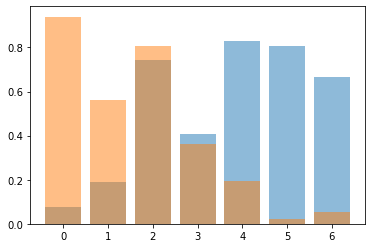

In [301]:
plt.bar(range(a_b.shape[0]),a_b,alpha=0.5)
plt.bar(range(a_b.shape[0]),b_a,alpha=0.5)

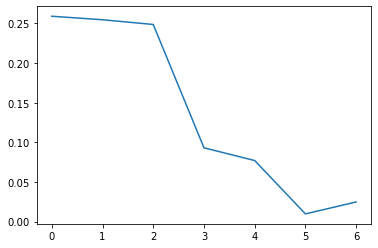

In [298]:
plt.plot(b_a)

In [39]:
labels = ['s','s','s7p3','s5p5','s3p7','p','p']
def flatten(tensor,labels):
    df_list = []
    for i in range(tensor.shape[0]):
        tdf = pd.DataFrame(tensor[i].numpy())
        tdf['label'] = labels[i]
        tdf['step'] = list(range(1,tensor.shape[1]+1,1))
        df_list.append(tdf)
        # print(df[0].shape)
    df = pd.concat(df_list,axis=0)
    return df

In [41]:
df = flatten(a_b,labels)
df.shape

(147, 3)

In [45]:
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
df.columns = ['x','g','y']
# fdf['x'] = np.log(fdf.x + 1e-5)
df.head()
fdf=df

/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


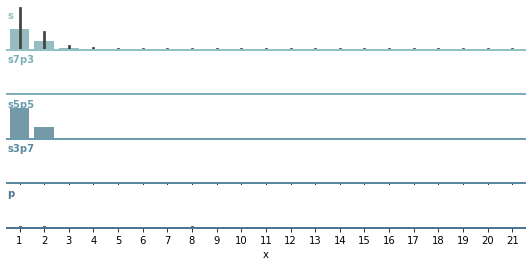

In [46]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(9, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True, height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'y','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)